In [1]:
# Import required packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
# Load pima indian dataset as Pandas dataframe
diabetes_pima = pd.read_csv('diabetes-pima.csv')

In [3]:
# Display first 5 lines
diabetes_pima.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
# Display shape of dataset
diabetes_pima.shape

(768, 9)

In [5]:
# Display data types of variables
diabetes_pima.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [6]:
# Replace numerical value for outcome/diabetes diagnosis with categorical equivalent
diabetes_pima = diabetes_pima.replace \
({'Outcome': {0: 'N', 1: 'Y'}})

In [7]:
# Display summary statistics for numerical features
diabetes_pima.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


In [8]:
# Display summary statistics for categorical features
diabetes_pima.describe(include=['O'])

,Outcome
count,768
unique,2
top,N
freq,500


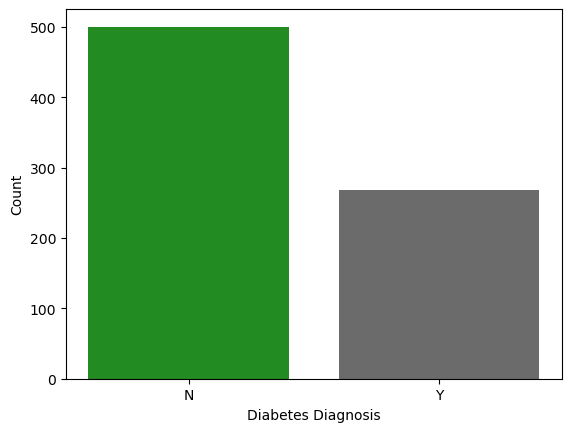

In [9]:
# Create bar chart showing outcome variable

outcome = diabetes_pima['Outcome'].value_counts()
plt.bar(outcome.index, outcome.values, color=['#228B22', '#6B6B6B'])
plt.xlabel('Diabetes Diagnosis')
plt.ylabel('Count')
plt.show()


In [10]:
# Validate if there is missing data
diabetes_pima.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

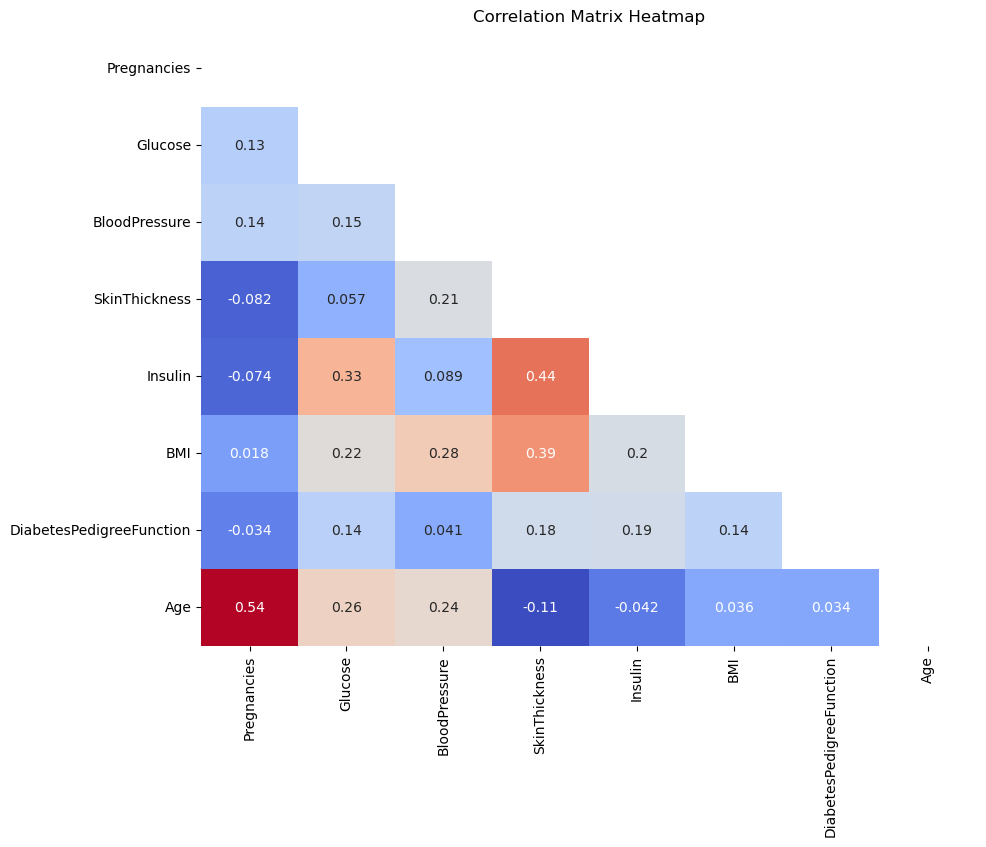

In [11]:
# Heatmap
# Create the correlation matrix
correlation_matrix = diabetes_pima.corr()
# Define mask object for heatmap
mask=np.triu(np.ones_like(correlation_matrix))
# Create the heatmap
plt.figure(figsize=(10, 8)) # Set the figure size
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm',
cbar=False)
13
# Set title
plt.title('Correlation Matrix Heatmap')
# Display the plot
plt.show()

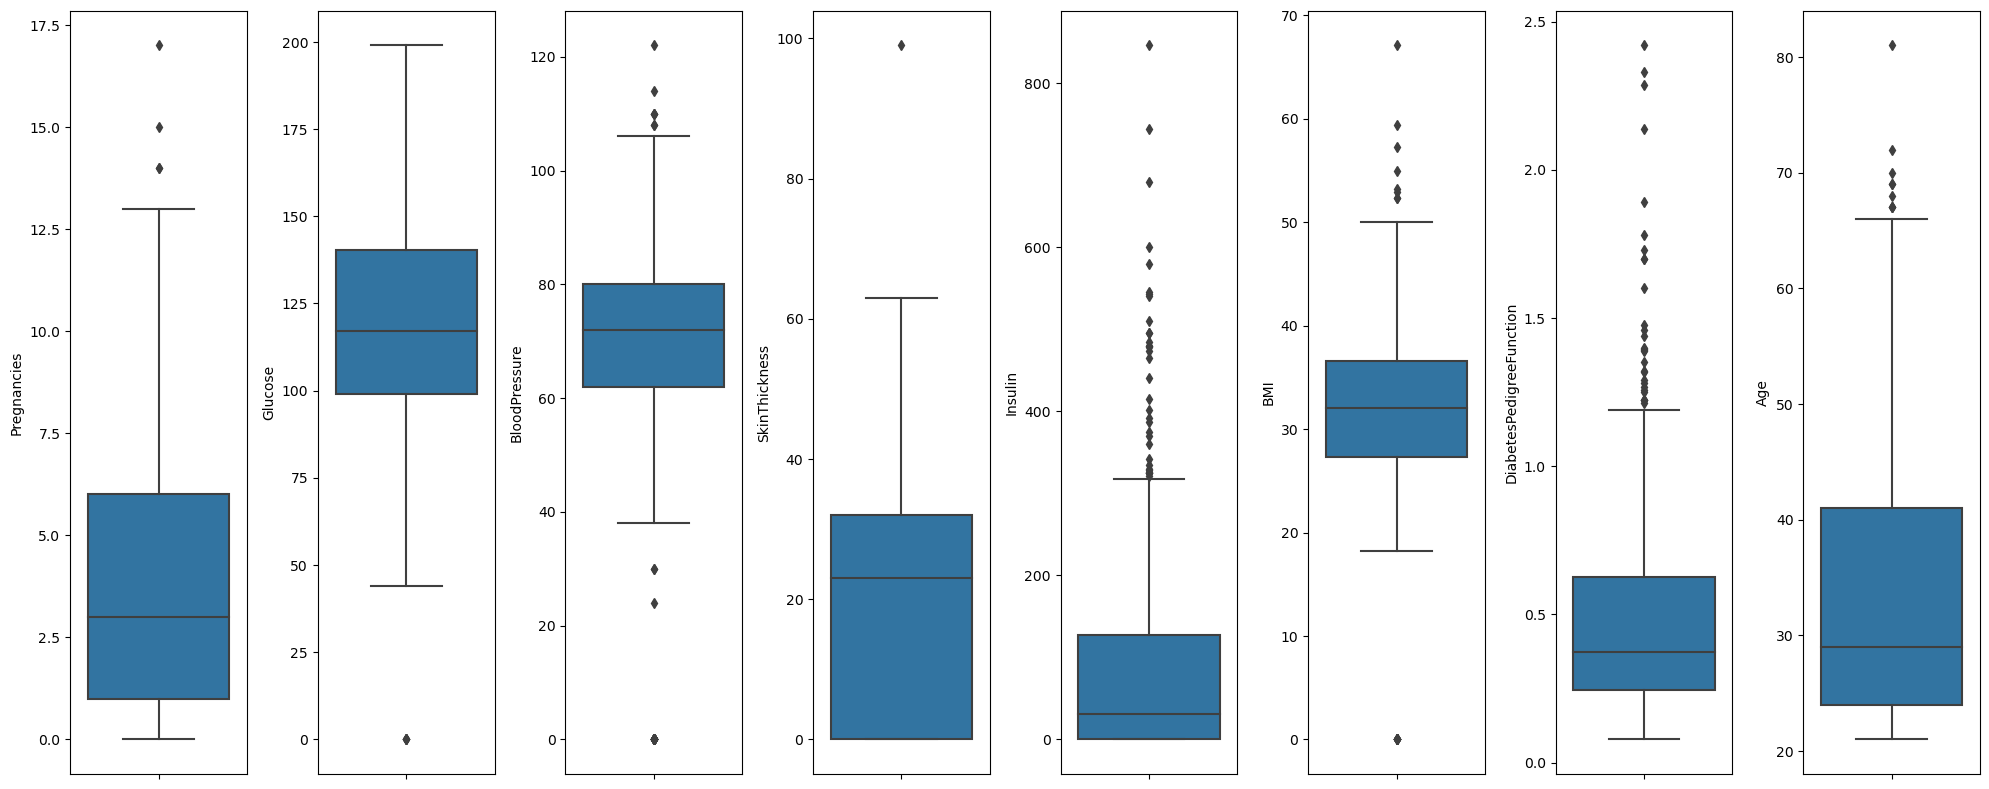

In [12]:
### Check for outliers
_, ax = plt.subplots(1, 8, figsize=(20,8))
for idx , col in enumerate(diabetes_pima.select_dtypes('number').columns):
    sns.boxplot(data=diabetes_pima, y=col, ax=ax[idx])

plt.tight_layout()
plt.show()

In [13]:
# Create new dataframe to maintain integrity of original dataset
data = diabetes_pima


In [14]:
# Import packages for analysis
from scipy import stats

# Select variables to detect outliers
variables =['Pregnancies','Glucose','BloodPressure','SkinThickness',
            'Insulin','BMI','DiabetesPedigreeFunction','Age']

# Detect and remove outliers using z-score method
z_scores = np.abs(stats.zscore(data[variables]))
threshold = 3

# Find the indices of outliers
outlier_indices = np.where(z_scores > threshold)

# Remove outliers from the dataset
data = data.drop(data.index[outlier_indices[0]])

# Print the number of outliers detected and removed
print("Number of outliers detected and removed:")
for i, variable in enumerate(variables):
    print(f"{variable}: {len(outlier_indices[0][outlier_indices[1] == i])}")

# Save the data without outliers to a new CSV file
data.to_csv("data_without_outliers.csv", index=False)

Number of outliers detected and removed:
Pregnancies: 4
Glucose: 5
BloodPressure: 35
SkinThickness: 1
Insulin: 18
BMI: 14
DiabetesPedigreeFunction: 11
Age: 5


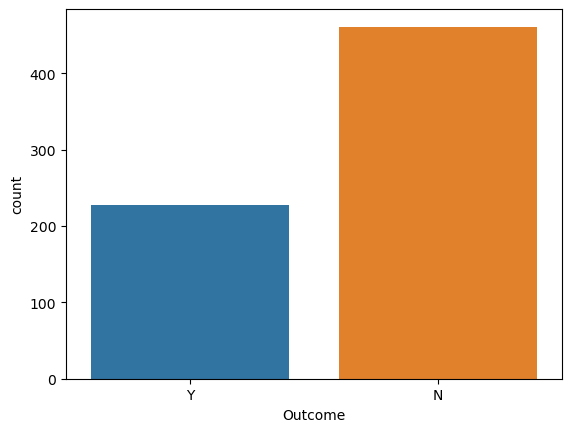

In [15]:
# Split data into features and target

from collections import Counter
features = data.drop('Outcome', axis=1)
target = data['Outcome']
Counter(target)
sns.countplot(data=data, x='Outcome')
plt.show()


In [16]:
# Import packages to prep data for modeling
import sklearn
from sklearn.model_selection import train_test_split

# Create features and target variables
features, target = data.drop('Outcome', axis= 1), data['Outcome']

In [17]:
# Split into  training and test sets
features_train, features_test, target_train, target_test = \
train_test_split(features, target, random_state=0, test_size = 0.2)

In [18]:
# Display the sizes of the training and test feature sets
print(features_train.shape)
print(features_test.shape)

# Display number of diabetes positive patients are in the training and test sets
print(target_train.value_counts())
print(target_test.value_counts())

(550, 8)
(138, 8)
N    375
Y    175
Name: Outcome, dtype: int64
N    86
Y    52
Name: Outcome, dtype: int64


In [19]:
# Searching for best model using a variety of classifiers
# Import required libraries, create pipeline, 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler # For scaling features
from sklearn.feature_selection import VarianceThreshold # Feature selector
from sklearn.decomposition import PCA # Feature reduction
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings("ignore")


In [20]:
# Create min-max scaler
minmax = MinMaxScaler()

# Create KNN classifier
knn = KNeighborsClassifier(n_neighbors=5, n_jobs=-1)

# Create Pipeline
pipe = Pipeline([('preprocess', minmax), ('model', knn)])

default_knn=pipe.fit(features_train,target_train)

In [21]:
default_preds=default_knn.predict(features_test)

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

print("Accuracy Score : ", accuracy_score(target_test, default_preds))

Accuracy Score :  0.7318840579710145


In [22]:
# Create  search space for KNN classifier where “n_neighbors” parameter varies from 1 to 10
search_space =[{'model__n_neighbors': [1,2,3,4,5,6,7,8,9,10]}]

# Create grid search
gridsearch = GridSearchCV(pipe, search_space, cv=5, verbose=0).fit(features_train, target_train)

In [23]:
# Find best neighborhood size (k)

gridsearch.best_estimator_.get_params()['model__n_neighbors']

5

In [24]:
# Create predictions using best neighborhood size
optimal_preds=gridsearch.predict(features_test)

# Display accuracy

print("Accuracy Score : ", accuracy_score(target_test, optimal_preds))

Accuracy Score :  0.7318840579710145


In [25]:
# Create Updated Pipeline with additional preprocess and selectors
pipe = Pipeline([('preprocess', StandardScaler()),('selector', PCA(n_components=0.90, whiten=True)), ('model', knn)])

# Update search space with additional preprocessing, feature selector, learning algorithms and hyperparameters

search_space = [{'model': [LogisticRegression()],
             'model__penalty': ['l1', 'l2'],
             'model__solver': ['saga'],
             'model__C': np.logspace(0,4,10)},
            {'model': [RandomForestClassifier()],
            'model__n_estimators': [10,100,1000],
            'model__max_features':[1,2,3]},
            {'model': [KNeighborsClassifier(n_jobs=-1)],
            'model__n_neighbors': [1,2,3,4,5,6,7,8,9,10]}]

# Create new grid search
gridsearch=GridSearchCV(pipe, search_space, cv=5, verbose=0)

In [26]:
# Fit grid search
best_model = gridsearch.fit(features_train, target_train)

In [27]:
# View best model's hyperparameters
best_params = best_model.best_params_
print(best_params)

{'model': LogisticRegression(C=2.7825594022071245, penalty='l1', solver='saga'), 'model__C': 2.7825594022071245, 'model__penalty': 'l1', 'model__solver': 'saga'}


In [28]:
# View best model's pipe
best_pipe = best_model.best_estimator_
print(best_pipe)

Pipeline(steps=[('preprocess', StandardScaler()),
                ('selector', PCA(n_components=0.9, whiten=True)),
                ('model',
                 LogisticRegression(C=2.7825594022071245, penalty='l1',
                                    solver='saga'))])


In [29]:
# Create predictions with best model
best_preds = best_model.predict(features_test)

In [30]:
# Display model accuracy
print("Accuracy Score : ", accuracy_score(target_test, best_preds))

Accuracy Score :  0.7463768115942029


In [31]:
# Create Updated Pipeline with additional preprocess and selectors
pipe = Pipeline([('preprocess', minmax),('selector', VarianceThreshold()), ('model', knn)])

# Update search space with additional preprocessing, feature selector, learning algorithms and hyperparameters

search_space = [{'preprocess':[StandardScaler(), MinMaxScaler()]},
                {'selector': [VarianceThreshold()],
                 'selector__threshold': [0, 0.001, 0.01]},
                {'selector': [PCA(n_components=0.99, whiten=True)]},
                {'model': [LogisticRegression()],
             'model__penalty': ['l1', 'l2'],
             'model__solver': ['saga'],
             'model__C': np.logspace(0,4,10)},
            {'model': [RandomForestClassifier()],
            'model__n_estimators': [10,100,1000],
            'model__max_features':[1,2,3]},
            {'model': [KNeighborsClassifier(n_jobs=-1)],
            'model__n_neighbors': [1,2,3,4,5,6,7,8,9,10]}]

# Create new grid search
gridsearch=GridSearchCV(pipe, search_space, cv=5, verbose=0)

In [32]:
# Fit grid search
best_model = gridsearch.fit(features_train, target_train)

In [33]:
# View best model's hyperparameters
best_params = best_model.best_params_
print(best_params)

{'model': LogisticRegression(penalty='l1', solver='saga'), 'model__C': 1.0, 'model__penalty': 'l1', 'model__solver': 'saga'}


In [34]:
# View best model's pipe
best_pipe = best_model.best_estimator_
print(best_pipe)

Pipeline(steps=[('preprocess', MinMaxScaler()),
                ('selector', VarianceThreshold()),
                ('model', LogisticRegression(penalty='l1', solver='saga'))])


In [35]:
# Create predictions with best model
best_preds = best_model.predict(features_test)

In [36]:
# Display model accuracy
print("Accuracy Score : ", accuracy_score(target_test, best_preds))

Accuracy Score :  0.7463768115942029


In [37]:
# Load al-kindy data set as Pandas dataframe
diabetes_alk = pd.read_csv('diabetes-al-kindy.csv')

In [38]:
# Display first 5 lines
diabetes_alk.head()

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,735,34221,M,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,420,47975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,680,87656,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,504,34223,M,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N


In [39]:
# Display shape of dataset
diabetes_alk.shape

(1000, 14)

In [40]:
# Display dtypes of dataset
diabetes_alk.dtypes

ID             int64
No_Pation      int64
Gender        object
AGE            int64
Urea         float64
Cr             int64
HbA1c        float64
Chol         float64
TG           float64
HDL          float64
LDL          float64
VLDL         float64
BMI          float64
CLASS         object
dtype: object

In [41]:
# Display summary statistics for numerical features
diabetes_alk.describe()

,ID,No_Pation,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI
count,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,340.500000,2.705514e+05,53.528000,5.124743,68.943000,8.281160,4.862820,2.349610,1.204750,2.609790,1.854700,29.578020
std,240.397673,3.380758e+06,8.799241,2.935165,59.984747,2.534003,1.301738,1.401176,0.660414,1.115102,3.663599,4.962388
min,1.000000,1.230000e+02,20.000000,0.500000,6.000000,0.900000,0.000000,0.300000,0.200000,0.300000,0.100000,19.000000
25%,125.750000,2.406375e+04,51.000000,3.700000,48.000000,6.500000,4.000000,1.500000,0.900000,1.800000,0.700000,26.000000
50%,300.500000,3.439550e+04,55.000000,4.600000,60.000000,8.000000,4.800000,2.000000,1.100000,2.500000,0.900000,30.000000
75%,550.250000,4.538425e+04,59.000000,5.700000,73.000000,10.200000,5.600000,2.900000,1.300000,3.300000,1.500000,33.000000
max,800.000000,7.543566e+07,79.000000,38.900000,800.000000,16.000000,10.300000,13.800000,9.900000,9.900000,35.000000,47.750000


In [42]:
# Display summary statistics for categorical features
diabetes_alk.describe(include=['O'])

,Gender,CLASS
count,1000,1000
unique,3,5
top,M,Y
freq,565,840


In [43]:
# Display values for CLASS as there are 5 unique values
print(diabetes_alk['CLASS'].value_counts())

Y     840
N     102
P      53
Y       4
N       1
Name: CLASS, dtype: int64


In [44]:
# Display values for Gender as there are 3 unique values
print(diabetes_alk['Gender'].value_counts())

M    565
F    434
f      1
Name: Gender, dtype: int64


In [45]:
# Cast common case to Gender column
diabetes_alk['Gender'] = diabetes_alk['Gender'].str.upper()

In [46]:
# Validate that Gender column updated
print(diabetes_alk['Gender'].value_counts())

M    565
F    435
Name: Gender, dtype: int64


In [47]:
# Remove whitespace from CLASS column then replace P with N
diabetes_alk['CLASS'] = diabetes_alk['CLASS'].apply(lambda x: x.strip())
#diabetes_alk['CLASS'] = diabetes_alk['CLASS'].replace('P','N')

In [48]:
# Validate that CLASS column updated
print(diabetes_alk['CLASS'].value_counts())

Y    844
N    103
P     53
Name: CLASS, dtype: int64


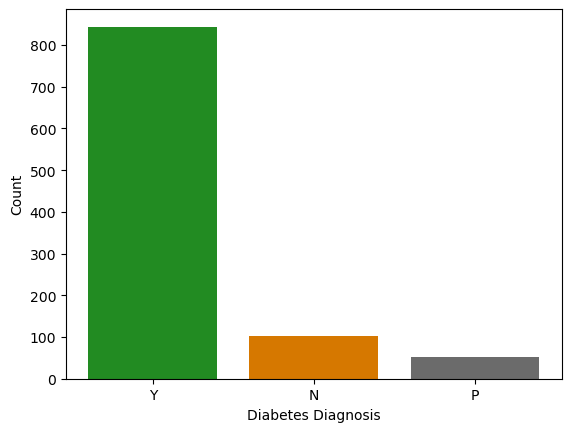

In [49]:
# Create bar chart showing outcome variable

diagnosis = diabetes_alk['CLASS'].value_counts()
plt.bar(diagnosis.index, diagnosis.values, color=['#228B22','#D67800','#6B6B6B'])
plt.xlabel('Diabetes Diagnosis')
plt.ylabel('Count')
plt.show()

In [50]:
# Verify if there is missing data
diabetes_alk.isna().sum()

ID           0
No_Pation    0
Gender       0
AGE          0
Urea         0
Cr           0
HbA1c        0
Chol         0
TG           0
HDL          0
LDL          0
VLDL         0
BMI          0
CLASS        0
dtype: int64

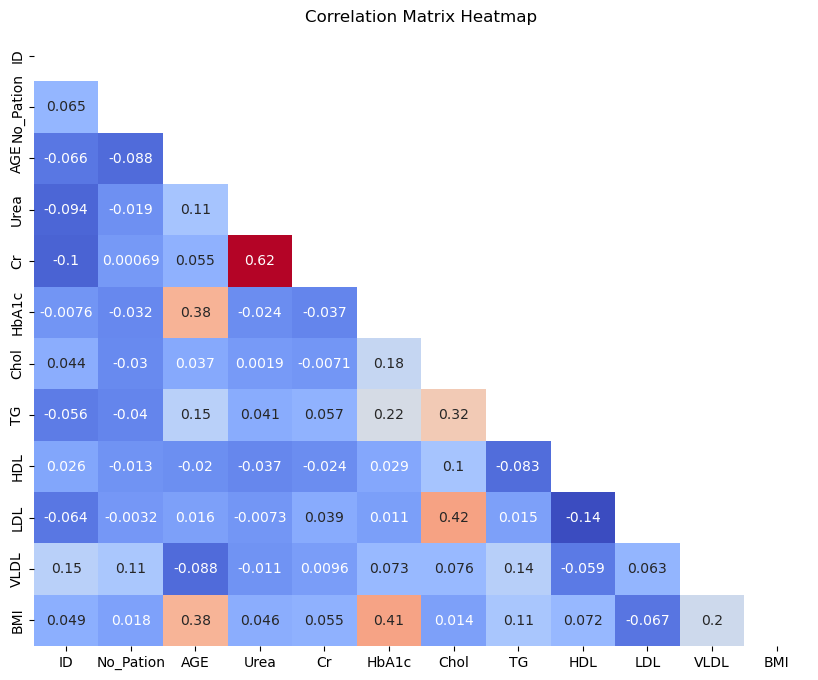

In [51]:
# Heatmap
# Create the correlation matrix
correlation_matrix = diabetes_alk.corr()
# Define mask object for heatmap
mask=np.triu(np.ones_like(correlation_matrix))
# Create the heatmap
plt.figure(figsize=(10, 8)) # Set the figure size
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm',
cbar=False)
13
# Set title
plt.title('Correlation Matrix Heatmap')
# Display the plot
plt.show()

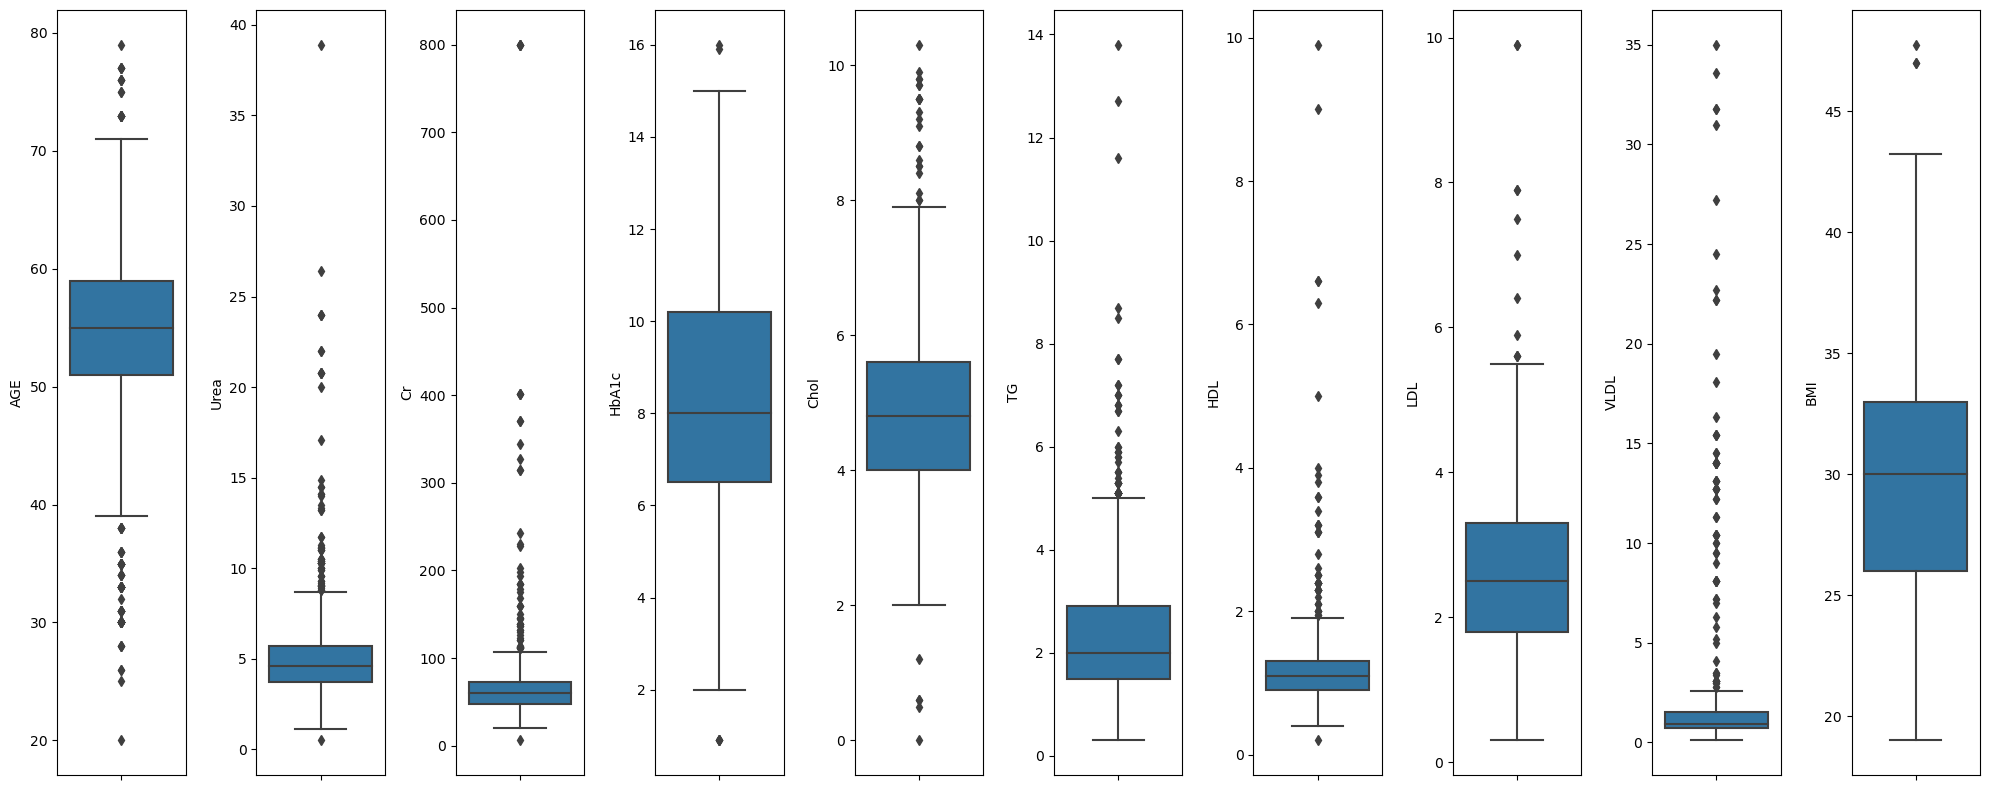

In [52]:
### Check for outliers
data_plots=diabetes_alk.drop(['ID', 'No_Pation'], axis=1)

_, ax = plt.subplots(1, 10, figsize=(20,8))
for idx , col in enumerate(data_plots.select_dtypes('number').columns):
    sns.boxplot(data=data_plots, y=col, ax=ax[idx])

plt.tight_layout()
plt.show()

In [76]:
# Create new dataframe to maintain integrity of original dataset
data2 = diabetes_alk

In [77]:
# Drop columns that have no use for analysis - ID and No_Pation

data2.drop(['ID', 'No_Pation'], axis=1)

# Select variables to detect outliers
variables =['AGE','Urea','Cr','HbA1c','Chol','TG',
            'HDL','LDL','VLDL','BMI']

# Detect and remove outliers using z-score method
z_scores = np.abs(stats.zscore(data2[variables]))
threshold = 3

# Find the indices of outliers
outlier_indices = np.where(z_scores > threshold)

# Remove outliers from the dataset
data2 = data2.drop(data2.index[outlier_indices[0]])

# Print the number of outliers detected and removed
print("Number of outliers detected and removed:")
for i, variable in enumerate(variables):
    print(f"{variable}: {len(outlier_indices[0][outlier_indices[1] == i])}")

# Save the data without outliers to a new CSV file
data2.to_csv("data2_without_outliers.csv", index=False)

Number of outliers detected and removed:
AGE: 4
Urea: 19
Cr: 13
HbA1c: 2
Chol: 19
TG: 17
HDL: 15
LDL: 7
VLDL: 30
BMI: 3


In [78]:
# Create features and target variables
features2, target2 = data2.drop('CLASS', axis= 1), data2['CLASS']

In [79]:
# Create dummy variables for categorical features
features2 = pd.get_dummies(features2)

In [80]:
# Split into  training and test sets
features2_train, features2_test, target2_train, target2_test = \
train_test_split(features2, target2, random_state=0, test_size = 0.2)

In [81]:
# Create Pipeline
pipe = Pipeline([('preprocess', minmax), ('model', knn)])

default_knn2=pipe.fit(features2_train,target2_train)

In [82]:
# Create predictions
default_preds2=default_knn2.predict(features2_test)

print("Accuracy Score : ", accuracy_score(target2_test, default_preds2))

Accuracy Score :  0.9329608938547486


In [83]:
# Create  search space for KNN classifier where “n_neighbors” parameter varies from 1 to 10
search_space =[{'model__n_neighbors': [1,2,3,4,5,6,7,8,9,10]}]

# Create grid search
gridsearch2 = GridSearchCV(pipe, search_space, cv=5, verbose=0).fit(features2_train, target2_train)

In [84]:
# Find best neighborhood size (k)

gridsearch2.best_estimator_.get_params()['model__n_neighbors']

7

In [85]:
# Create predictions using best neighborhood size
optimal_preds2=gridsearch2.predict(features2_test)

# Display accuracy

print("Accuracy Score : ", accuracy_score(target2_test, optimal_preds2))

Accuracy Score :  0.9441340782122905


In [86]:
# Create Updated Pipeline with additional preprocess and selectors
pipe = Pipeline([('preprocess', StandardScaler()),('selector', PCA(n_components=0.90, whiten=True)), ('model', knn)])

# Update search space with additional preprocessing, feature selector, learning algorithms and hyperparameters

search_space = [{'model': [LogisticRegression()],
             'model__penalty': ['l1', 'l2'],
             'model__solver': ['saga'],
             'model__C': np.logspace(0,4,10)},
            {'model': [RandomForestClassifier()],
            'model__n_estimators': [10,100,1000],
            'model__max_features':[1,2,3]},
            {'model': [KNeighborsClassifier(n_jobs=-1)],
            'model__n_neighbors': [1,2,3,4,5,6,7,8,9,10]}]

# Create new grid search
gridsearch2=GridSearchCV(pipe, search_space, cv=5, verbose=0)

In [87]:
# Fit grid search
best_model2 = gridsearch2.fit(features2_train, target2_train)

In [88]:
# View best model's hyperparameters
best_params2 = best_model2.best_params_
print(best_params2)

{'model': RandomForestClassifier(max_features=3, n_estimators=1000), 'model__max_features': 3, 'model__n_estimators': 1000}


In [89]:
# View best model's pipe
best_pipe2 = best_model2.best_estimator_
print(best_pipe2)

Pipeline(steps=[('preprocess', StandardScaler()),
                ('selector', PCA(n_components=0.9, whiten=True)),
                ('model',
                 RandomForestClassifier(max_features=3, n_estimators=1000))])


In [90]:
# Create predictions with best model
best_preds2 = best_model2.predict(features2_test)

In [91]:
# Display model accuracy
print("Accuracy Score : ", accuracy_score(target2_test, best_preds2))

Accuracy Score :  0.9441340782122905


In [92]:
# Create Updated Pipeline with additional preprocess and selectors
pipe = Pipeline([('preprocess', minmax),('selector', VarianceThreshold()), ('model', knn)])

# Update search space with additional preprocessing, feature selector, learning algorithms and hyperparameters

search_space = [{'preprocess':[StandardScaler(), MinMaxScaler()]},
                {'selector': [VarianceThreshold()],
                 'selector__threshold': [0, 0.001, 0.01]},
                {'selector': [PCA(n_components=0.99, whiten=True)]},
                {'model': [LogisticRegression()],
             'model__penalty': ['l1', 'l2'],
             'model__solver': ['saga'],
             'model__C': np.logspace(0,4,10)},
            {'model': [RandomForestClassifier()],
            'model__n_estimators': [10,100,1000],
            'model__max_features':[1,2,3]},
            {'model': [KNeighborsClassifier(n_jobs=-1)],
            'model__n_neighbors': [1,2,3,4,5,6,7,8,9,10]}]

# Create new grid search
gridsearch2=GridSearchCV(pipe, search_space, cv=5, verbose=0)

In [93]:
# Fit grid search
best_model2 = gridsearch2.fit(features2_train, target2_train)

In [94]:
# View best model's hyperparameters
best_params2 = best_model2.best_params_
print(best_params2)

{'model': RandomForestClassifier(max_features=3, n_estimators=1000), 'model__max_features': 3, 'model__n_estimators': 1000}


In [95]:
# View best model's pipe
best_pipe2 = best_model2.best_estimator_
print(best_pipe2)

Pipeline(steps=[('preprocess', MinMaxScaler()),
                ('selector', VarianceThreshold()),
                ('model',
                 RandomForestClassifier(max_features=3, n_estimators=1000))])


In [96]:
# Create predictions with best model
best_preds2 = best_model2.predict(features2_test)

In [97]:
# Display model accuracy
print("Accuracy Score : ", accuracy_score(target2_test, best_preds2))

Accuracy Score :  0.9664804469273743
